# DATA LOADING

In [38]:
import pandas as pd 
import numpy as np

In [39]:
df = pd.read_csv('Dataset/Preprocessed_Data.csv')

In [40]:
df.head()

,Unnamed: 0,reviews,feedback
0,0,Love Echo,1
1,1,love it,1
2,2,sometimes play game answer question correctly ...,1
3,3,I have have lot of fun thing 4 or old learn di...,1
4,4,music,1


In [41]:
df = df.drop(columns=['Unnamed: 0'])

In [42]:
for col in df.columns:
    if df[col].isnull().sum()!=0 :
       mode_value = df[col].mode()[0]
       df[col] = df[col].fillna(mode_value)

In [43]:
df.isnull().sum()

reviews     0
feedback    0
dtype: int64

In [44]:
df

,reviews,feedback
0,Love Echo,1
1,love it,1
2,sometimes play game answer question correctly ...,1
3,I have have lot of fun thing 4 or old learn di...,1
4,music,1
...,...,...
3145,perfect kid adult in between,1
3146,listen music searching location check time loo...,1
3147,I love thing have run entire home to light the...,1
3148,only complaint have be sound quality be not gr...,1


# TEXT REPRESENTATION

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
vectorizer = TfidfVectorizer()

In [47]:
x = vectorizer.fit_transform(df['reviews'])

In [48]:
y = df.feedback

In [67]:
with open('vectorizer','wb') as f:
    pickle.dump(vectorizer,f)

# HANDLING CLASS IMBALANCE

In [49]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

----> There is class imbalance, positive reviews are majority class and negative reviews are minority class

In [50]:
from imblearn.over_sampling import SMOTE 

In [51]:
resampler = SMOTE()

In [52]:
X_resample, y_resample = resampler.fit_resample(x,y)

In [53]:
y_resample.value_counts()

1    2893
0    2893
Name: feedback, dtype: int64

Class Balancing achieved

# SPLITTING DATASET

In [54]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample, test_size=0.255, random_state=33)

# MODELLING

In [55]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, KFold

In [24]:
models = [LogisticRegression(max_iter=4000), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(n_estimators=1000), BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000), GradientBoostingClassifier(n_estimators=1000),MultinomialNB()]

In [25]:
# Initial stage evaluation on train and test data.
for model in models:
    model.fit(X_train,y_train)
    print(f'{model} Model Performance (Accuracy) on train data: {model.score(X_train,y_train)*100}')
    print(f'{model} Model Performance (Accuracy) on test data: {model.score(X_test,y_test)*100}')
    print('*********************************************************************************')

LogisticRegression(max_iter=4000) Model Performance (Accuracy) on train data: 94.70997679814384
LogisticRegression(max_iter=4000) Model Performance (Accuracy) on test data: 93.4959349593496
*********************************************************************************
SVC() Model Performance (Accuracy) on train data: 97.35498839907193
SVC() Model Performance (Accuracy) on test data: 97.01897018970189
*********************************************************************************
DecisionTreeClassifier() Model Performance (Accuracy) on train data: 97.4013921113689
DecisionTreeClassifier() Model Performance (Accuracy) on test data: 92.81842818428184
*********************************************************************************
RandomForestClassifier() Model Performance (Accuracy) on train data: 97.4013921113689
RandomForestClassifier() Model Performance (Accuracy) on test data: 95.9349593495935
*********************************************************************************
AdaB

In [26]:
# More robust evaluation using cross-validation 
kfold = KFold(n_splits=6, shuffle=True,random_state=32)
for model1 in models:
    scores = cross_val_score(model1,X_train,y_train,cv=kfold)
    print(f'Cross-Validation Scores for {model1} : {np.mean(scores)*100}')

Cross-Validation Scores for LogisticRegression(max_iter=4000) : 93.03953701300293
Cross-Validation Scores for SVC() : 96.82138738550266
Cross-Validation Scores for DecisionTreeClassifier() : 93.45700918044896
Cross-Validation Scores for RandomForestClassifier() : 95.38317300800787
Cross-Validation Scores for AdaBoostClassifier(n_estimators=1000) : 94.8259730901399
Cross-Validation Scores for BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000) : 93.61936843573363
Cross-Validation Scores for GradientBoostingClassifier(n_estimators=1000) : 94.3851914412233
Cross-Validation Scores for MultinomialNB() : 90.0469159812646


SupportVectorMachine Classifier:
1. Train Accuracy: 97.35%
2. Test Accuracy: 97.15%
3. Cross-Validation Score: 96.82%

The SupportVectorMachine Classifier stands out with the highest test accuracy (97.15%) and a strong cross-validation score (96.82%). It also has good performance on the training data, indicating a good balance between bias and variance.

In [56]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [57]:
model.score(X_train,y_train)

0.9735498839907193

In [58]:
model.score(X_test,y_test)

0.9715447154471545

# MODEL EVALUATION

In [59]:
from sklearn.metrics import classification_report , accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
y_pred = model.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       756
           1       1.00      0.94      0.97       720

    accuracy                           0.97      1476
   macro avg       0.97      0.97      0.97      1476
weighted avg       0.97      0.97      0.97      1476



In [62]:
accuracy_score(y_test,y_pred)

0.9715447154471545

In [63]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[756,   0],
       [ 42, 678]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Values')

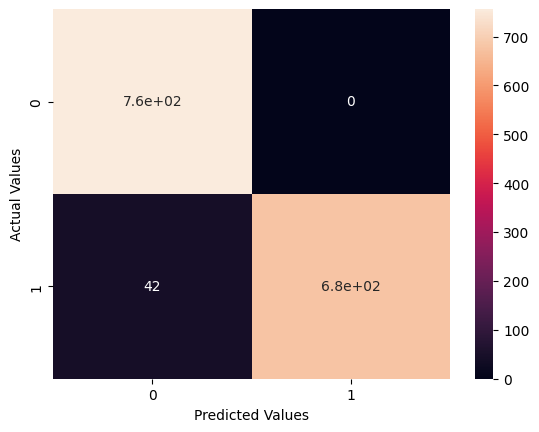

In [64]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# MODEL SAVING

In [65]:
import pickle

In [66]:
with open('sentiment_analysis','wb') as f:
    pickle.dump(model,f)